In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [19]:
def f(z):
    return np.asarray(z)**2 - 1

f(0)

np.int64(-1)

In [20]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

In [21]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

In [23]:
mesh = x + 1j * y
#1j는 파이썬 복소수표현법

In [10]:
output = np.abs(f(mesh))

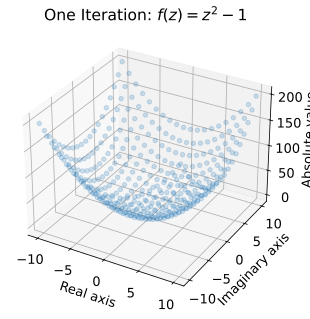

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$');

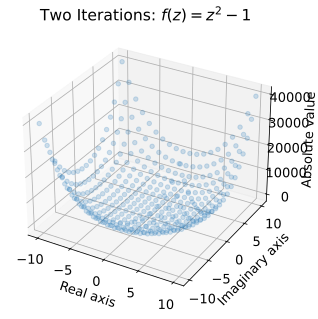

In [12]:
output = np.abs(f(f(mesh))) # 함수 두 번 반복

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

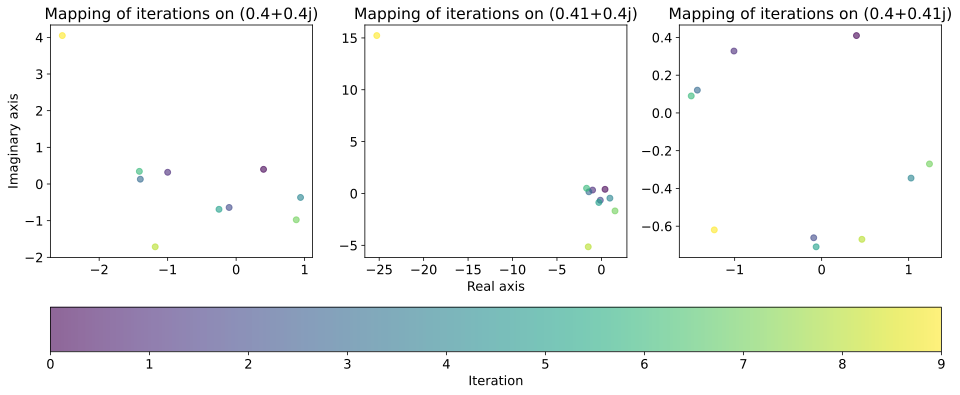

In [13]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]),
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

In [24]:
def divergence_rate(mesh, num_iter=10, radius=2):
    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape)

    for i in range(num_iter):
        # 1. 발산하지 않은 값들에 대한 마스크 (절대값 < 반경)
        mask = np.abs(z) < radius

        # 2. 아직 발산하지 않은 포인트들의 반복 횟수 +1
        diverge_len[mask] += 1

        # 3. 발산하지 않은 z에 대해 함수 f(z) 적용
        z[mask] = f(z[mask])

    return diverge_len

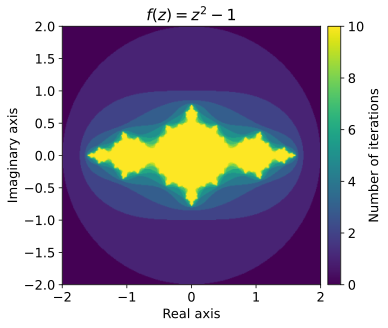

In [25]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');